### Imports

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cfgrib
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf

/home/hpdeandrade/Projects/ChuvaRealizada/.venv/lib/python3.10/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


### Matplotlib configuration

In [2]:
plt.rcParams["font.size"] = 8
plt.rcParams["axes.axisbelow"] = True
plt.rcParams["figure.dpi"] = 100
plt.rcParams["savefig.dpi"] = 100

### Places registered

In [3]:
class Miramontes:
    
    lat = -20.679444
    lon = -47.142944 + 360

class Jaragua:

    lat = -20.693278
    lon = -47.208722 + 360

### User inputs

In [4]:
date = "20240122"
place = Jaragua
lat = place.lat
lon = place.lon

### Download file

In [5]:
# Work in progress

### Retrieve file

In [6]:
data = xr.open_dataset(f"input/MERGE_CPTEC_{date}.grib2", engine="cfgrib")
date_str = data.valid_time.dt.strftime("%d %B %Y").values

### Precipitation data

In [7]:
data.prec

<xarray.DataArray 'prec' (latitude: 924, longitude: 1001)>
[924924 values with dtype=float32]
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude   (longitude) float64 239.9 240.0 240.1 ... 339.8 339.9 339.9
    valid_time  datetime64[ns] 2024-01-22T12:00:00
Attributes: (12/29)
    GRIB_paramId:                             260138
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      924924
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Precipitation
    GRIB_shortName:                           prec
    GRIB_units:                               kg m**-2
    long_name:                                Precipitation
    units:                                    kg m**-2
    standard_name:                            unknown

### Plot precipitation data

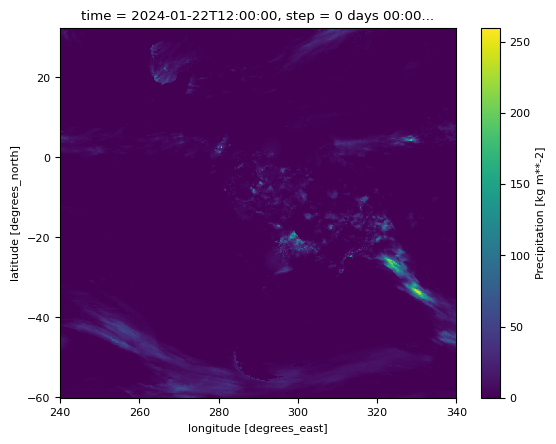

In [8]:
fig = data.prec.plot()

### Map boundaries

In [9]:
lon_min = lon - 8
lon_max = lon + 8
lat_min = lat - 8
lat_max = lat + 8

### Plot precipitation data within boundaries and using Cartopy

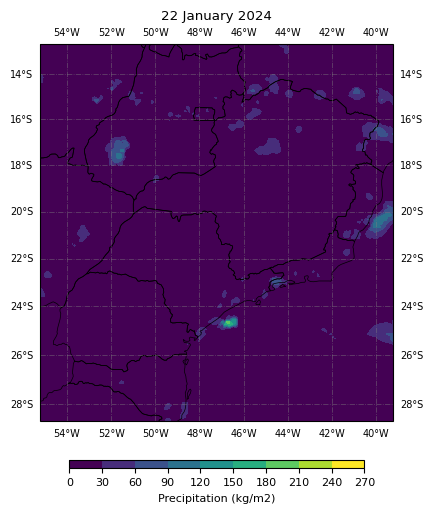

In [10]:
projection = ccrs.Mercator()

# specify CRS that will be used to tell the code where should our data be plotted
crs = ccrs.PlateCarree()

# figure and axis object
fig = plt.figure(figsize=(5, 5), dpi=100, constrained_layout=True)
ax = fig.add_subplot(1, 1, 1, projection=projection, frameon=True)

# draw gridlines in degrees over Mercator map
gl = ax.gridlines(crs=crs, draw_labels=True, linewidth=0.6, color="gray", alpha=0.5, linestyle="-.")
gl.xlabel_style = {"size" : 7}
gl.ylabel_style = {"size" : 7}

# to plot borders and coastlines, we can use cartopy feature
ax.add_feature(cf.STATES.with_scale("50m"), lw=0.5)

# plot values
cbar_kwargs = {"orientation": "horizontal", "shrink": 0.6, "pad": 0.05, "aspect": 40, "label": "Precipitation (kg/m2)"}
data.prec.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs=cbar_kwargs, levels=11)

# crs is PlateCarree, meaning we are explicitly telling axes that we are creating bounds that are in degrees
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=crs)

# show
ax.set_title(date_str)
plt.show()

fig.savefig(f"output.png")

### Precipitation at specific coordinate

In [11]:
prec_nearest = round(float(data.prec.sel(latitude=lat, longitude=lon, method="nearest").values), 2)
prec_interp = round(float(data.prec.interp(latitude=lat, longitude=lon).values), 2)
print(f"{place.__name__} on {date_str}: prec_nearest: {prec_nearest} kg/m2 | prec_interp: {prec_interp} kg/m2")

Jaragua on 22 January 2024: prec_nearest: 4.75 kg/m2 | prec_interp: 6.63 kg/m2
